# The project investigates higher education student enrolment patterns in Ireland for 2018-19. The project uses data supplied by the Higher Education Authority. the project is particularly interested in enrolment patterns within and outside the SE of Ireland and, specifically, in the pattern of enrolment of students with a domiciliary origin of the SE of Ireland who study outside the SE of Ireland. The project seeks to parse the data to identify the course disciplinary areas, institution type, and institution that enrol students from the SE but are outside the SE. The project will in this way offer an analysis of the "brain drain" of students from the SE of Ireland.

In [5]:
# Setup

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Import CSV file

In [8]:
raw_material = pd.read_csv(r'\Users\rhayes\Desktop\UCD_Data_Analytics_Course\HEA_Student_Enrolment_Data_Domicilary_Origin_201819.csv')

In [9]:
raw_material.head()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined,County
0,1,2018/2019,(Other) EU,(0210) Arts not further defined or elsewhere c...,"National University of Ireland, Galway",NaN
1,1,2018/2019,(Other) EU,"(0212) Fashion, interior and industrial design",IT Carlow,NaN
2,1,2018/2019,(Other) EU,(0413) Management and administration,IT Carlow,NaN
3,1,2018/2019,(Other) EU,(0510) Biological and related sciences not fur...,Technological University Dublin,NaN
4,1,2018/2019,(Other) EU,(0512) Biochemistry,IT Carlow,NaN


In [10]:
## Import File to Merge https://citypopulation.de/en/ireland/towns/

In [11]:
import requests
county_population = requests.get("https://citypopulation.de/en/ireland/towns/")


In [12]:
from bs4 import BeautifulSoup as bs

In [13]:
county_pop_clean = bs(county_population.content, 'lxml')
county_pop_clean.text

'\n\n\n\nAll Towns (Ireland): Counties & Towns - Population Statistics, Charts and Map\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nHome → Europe → Ireland\n\n\n\n\n\n\n\n\n\nIreland: All Towns\n\n\n\nCounties\nThe population of all counties of the Republic of Ireland by census years.\n\n\nNameStatusPopulationCensus1991-04-21PopulationCensus1996-04-28PopulationCensus2002-04-28PopulationCensus2006-04-23PopulationCensus2011-04-10PopulationCensus2016-04-24\xa0\n\n\nCarlowCounty40,94241,61646,01450,34954,61256,932→\nCavanCounty52,79652,94456,54664,00373,18376,176→\nClareCounty90,91894,006103,277110,950117,196118,817→\nCorkCounty............319,494333,213→\nCork CityCity............199,538209,655→\nDonegalCounty128,117129,994137,575147,264161,137159,192→\nDublin CityCity478,389481,854495,781506,211527,612554,554→\nDún Laoghaire-RathdownCounty185,410189,999191,792194,038206,261218,018→\nFingalCounty152,766167,683196,413239,992273,991296,020→\nGalwayCounty129,511131,613143,245159,256175,124179,390→\nGa

In [14]:
county_pop_clean2 = county_pop_clean.findAll("County", "PopulationCensus2016-04-24")

In [15]:
county_pop_clean2

[]

In [16]:
scraped_data=pd.read_html("https://citypopulation.de/en/ireland/towns/")

In [17]:
print(len(scraped_data))

2


In [26]:
County_Populations=scraped_data[0]

In [31]:
County_Populations.groupby("Status")
County_Populations

,Name,Status,PopulationCensus1991-04-21,PopulationCensus1996-04-28,PopulationCensus2002-04-28,PopulationCensus2006-04-23,PopulationCensus2011-04-10,PopulationCensus2016-04-24,Unnamed: 8
0,Carlow,County,40942,41616,46014,50349,54612,56932,→
1,Cavan,County,52796,52944,56546,64003,73183,76176,→
2,Clare,County,90918,94006,103277,110950,117196,118817,→
3,Cork,County,...,...,...,...,319494,333213,→
4,Cork City,City,...,...,...,...,199538,209655,→
5,Donegal,County,128117,129994,137575,147264,161137,159192,→
6,Dublin City,City,478389,481854,495781,506211,527612,554554,→
7,Dún Laoghaire-Rathdown,County,185410,189999,191792,194038,206261,218018,→
8,Fingal,County,152766,167683,196413,239992,273991,296020,→
9,Galway,County,129511,131613,143245,159256,175124,179390,→


In [ ]:
# Clean File

In [7]:
# Generate DF1: Overall HE-going population in Ireland, by County

In [29]:
student_population=raw_material.groupby ( ["County"]) ["Number of Students"].agg(sum) # This is the number of students attending higher education from each county

In [30]:
print(student_population)

County
Antrim (including Belfast)                396
Armagh                                    100
Carlow                                   2763
Cavan                                    2870
Clare                                    5746
Cork                                    25397
Derry                                     255
Donegal                                  6420
Down                                      399
Dublin  (including postal districts)    49026
Fermanagh                                 119
Galway                                  12808
Kerry                                    6452
Kildare                                  9676
Kilkenny                                 4443
Laois                                    3126
Leitrim                                  1426
Limerick                                 8975
Longford                                 1585
Louth                                    5161
Mayo                                     5768
Meath                      

In [31]:
student_population.sum() # Total number of students in HE in Ireland 

201626

<AxesSubplot:xlabel='County'>

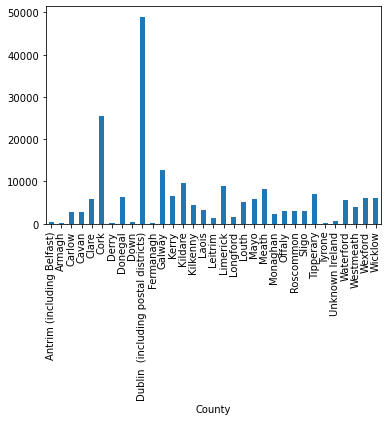

In [41]:
student_population.plot(kind="bar") #Plots out the overall shape of the student population

In [14]:
# Isolate HE-going Population from SE

In [15]:
raw_material_ind=raw_material.set_index ("County")

In [20]:
isolateSE1=raw_material_ind.loc[ ["Waterford", "Wexford", "Carlow", "Kilkenny"]]

In [22]:
isolateSE2=isolateWD1.sort_values("Institute New Combined")

In [23]:
isolateSE2.head()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined
County,,,,,
Wexford,1,2018/2019,Ireland,(0923) Social work and counselling,Athlone IT
Wexford,1,2018/2019,Ireland,"(1013) Hotel, restaurants and catering",Athlone IT
Wexford,5,2018/2019,Ireland,(1014) Sports,Athlone IT
Carlow,1,2018/2019,Ireland,(0410) Business and administration not further...,Athlone IT
Carlow,1,2018/2019,Ireland,(0411) Accounting and taxation,Athlone IT


In [26]:
SE_student_population=isolateSE2.groupby ("County").sum()

In [27]:
print(SE_student_population) #This is the number of students from each County attending Higher Education 

           Number of Students
County                       
Carlow                   2763
Kilkenny                 4443
Waterford                5490
Wexford                  6149


In [16]:
# ThIS FARraw_material_ind.sort_index()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined
County,,,,,
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0031) Personal skills and development,Trinity College Dublin
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0731) Architecture and town planning,IT Sligo
Antrim (including Belfast),2,2018/2019,Northern Ireland,(0715) Mechanics and metal trades,University College Dublin
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0715) Mechanics and metal trades,Letterkenny IT
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0714) Electronics and automation,Waterford IT
...,...,...,...,...,...
NaN,1,2018/2019,Unknown,"(1015) Travel, tourism and leisure",IT Sligo
NaN,1,2018/2019,Unknown,"(1015) Travel, tourism and leisure",Limerick IT
NaN,2,2018/2019,Unknown,(1022) Occupational health and safety,IT Sligo


In [17]:
raw_material_ind.sort_index()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined
County,,,,,
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0031) Personal skills and development,Trinity College Dublin
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0731) Architecture and town planning,IT Sligo
Antrim (including Belfast),2,2018/2019,Northern Ireland,(0715) Mechanics and metal trades,University College Dublin
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0715) Mechanics and metal trades,Letterkenny IT
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0714) Electronics and automation,Waterford IT
...,...,...,...,...,...
NaN,1,2018/2019,Unknown,"(1015) Travel, tourism and leisure",IT Sligo
NaN,1,2018/2019,Unknown,"(1015) Travel, tourism and leisure",Limerick IT
NaN,2,2018/2019,Unknown,(1022) Occupational health and safety,IT Sligo


In [18]:
raw_material_ind.sort_index(level=["County", "Number of Students"])

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined
County,,,,,
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0031) Personal skills and development,Trinity College Dublin
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0731) Architecture and town planning,IT Sligo
Antrim (including Belfast),2,2018/2019,Northern Ireland,(0715) Mechanics and metal trades,University College Dublin
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0715) Mechanics and metal trades,Letterkenny IT
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0714) Electronics and automation,Waterford IT
...,...,...,...,...,...
NaN,1,2018/2019,Unknown,"(1015) Travel, tourism and leisure",IT Sligo
NaN,1,2018/2019,Unknown,"(1015) Travel, tourism and leisure",Limerick IT
NaN,2,2018/2019,Unknown,(1022) Occupational health and safety,IT Sligo


In [19]:
WD_student.head()

NameError: name 'WD_student' is not defined

In [20]:
WD_student2=WD_student.groupby (["Institute New Combined"]) ["Number of Students"]. sum()
WD_student2.plot (kind="bar", rot=90)
plt.show()

NameError: name 'WD_student' is not defined

In [21]:
WD_student3=WD_student.sort_values("Institute New Combined")
WD_student_excludeWIT=WD_student3[~WD_student3 ["Institute New Combined"].isin("Waterford IT")]


NameError: name 'WD_student' is not defined

In [22]:
raw_material.head()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined,County
0,1,2018/2019,(Other) EU,(0210) Arts not further defined or elsewhere c...,"National University of Ireland, Galway",NaN
1,1,2018/2019,(Other) EU,"(0212) Fashion, interior and industrial design",IT Carlow,NaN
2,1,2018/2019,(Other) EU,(0413) Management and administration,IT Carlow,NaN
3,1,2018/2019,(Other) EU,(0510) Biological and related sciences not fur...,Technological University Dublin,NaN
4,1,2018/2019,(Other) EU,(0512) Biochemistry,IT Carlow,NaN


In [23]:
raw_material_ind=raw_material.set_index("County")

In [24]:
raw_material_ind.head()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined
County,,,,,
NaN,1,2018/2019,(Other) EU,(0210) Arts not further defined or elsewhere c...,"National University of Ireland, Galway"
NaN,1,2018/2019,(Other) EU,"(0212) Fashion, interior and industrial design",IT Carlow
NaN,1,2018/2019,(Other) EU,(0413) Management and administration,IT Carlow
NaN,1,2018/2019,(Other) EU,(0510) Biological and related sciences not fur...,Technological University Dublin
NaN,1,2018/2019,(Other) EU,(0512) Biochemistry,IT Carlow


In [25]:
raw_material_ind.isna()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined
County,,,,,
NaN,False,False,False,False,False
NaN,False,False,False,False,False
NaN,False,False,False,False,False
NaN,False,False,False,False,False
NaN,False,False,False,False,False
...,...,...,...,...,...
NaN,False,False,False,False,False
NaN,False,False,False,False,False
NaN,False,False,False,False,False


In [26]:
raw_material_ind.isna().any()

Number of Students        False
Academic Year             False
Dom Ireland GB            False
Isced Discipline          False
Institute New Combined    False
dtype: bool

In [27]:
raw_material.isna().any()

Number of Students        False
Academic Year             False
Dom Ireland GB            False
Isced Discipline          False
Institute New Combined    False
County                     True
dtype: bool

In [28]:
raw_material_ind.reset_index()

,County,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined
0,NaN,1,2018/2019,(Other) EU,(0210) Arts not further defined or elsewhere c...,"National University of Ireland, Galway"
1,NaN,1,2018/2019,(Other) EU,"(0212) Fashion, interior and industrial design",IT Carlow
2,NaN,1,2018/2019,(Other) EU,(0413) Management and administration,IT Carlow
3,NaN,1,2018/2019,(Other) EU,(0510) Biological and related sciences not fur...,Technological University Dublin
4,NaN,1,2018/2019,(Other) EU,(0512) Biochemistry,IT Carlow
...,...,...,...,...,...,...
16880,NaN,1,2018/2019,Unknown,"(1015) Travel, tourism and leisure",IT Sligo
16881,NaN,1,2018/2019,Unknown,"(1015) Travel, tourism and leisure",Limerick IT
16882,NaN,2,2018/2019,Unknown,(1022) Occupational health and safety,IT Sligo
16883,NaN,1,2018/2019,Unknown,(1041) Transport services,Cork IT


In [29]:
raw_material_ind.isna().any()

Number of Students        False
Academic Year             False
Dom Ireland GB            False
Isced Discipline          False
Institute New Combined    False
dtype: bool

In [30]:
raw_material_ind.sort_values("Number of Students", ascending=False)

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined
County,,,,,
NaN,1591,2018/2019,Non-EU,(0912) Medicine,Royal College of Surgeons
Cork,1489,2018/2019,Ireland,(0210) Arts not further defined or elsewhere c...,University College Cork
Dublin (including postal districts),1393,2018/2019,Ireland,(0410) Business and administration not further...,Technological University Dublin
Cork,1393,2018/2019,Ireland,(0413) Management and administration,Cork IT
Cork,1152,2018/2019,Ireland,(0410) Business and administration not further...,University College Cork
...,...,...,...,...,...
Longford,1,2018/2019,Ireland,(1014) Sports,Technological University Dublin
Longford,1,2018/2019,Ireland,(1014) Sports,IT Carlow
Longford,1,2018/2019,Ireland,(0923) Social work and counselling,University College Cork


In [31]:
raw_material_ind.sort_values("County", ascending=True)

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined
County,,,,,
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0031) Personal skills and development,Trinity College Dublin
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0731) Architecture and town planning,IT Sligo
Antrim (including Belfast),2,2018/2019,Northern Ireland,(0715) Mechanics and metal trades,University College Dublin
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0715) Mechanics and metal trades,Letterkenny IT
Antrim (including Belfast),1,2018/2019,Northern Ireland,(0714) Electronics and automation,Waterford IT
...,...,...,...,...,...
NaN,1,2018/2019,Unknown,"(1015) Travel, tourism and leisure",IT Sligo
NaN,1,2018/2019,Unknown,"(1015) Travel, tourism and leisure",Limerick IT
NaN,2,2018/2019,Unknown,(1022) Occupational health and safety,IT Sligo


raw_material_ind.groupby("Institute New Combined) ["Number of Students"]. sum()

In [32]:
most_populace_colleges=raw_material_ind.groupby("Institute New Combined") ["Number of Students"].sum()

In [33]:
most_populace_colleges.head()

Institute New Combined
Athlone IT                                                4833
Cork IT                                                  11054
Dublin City University                                   15558
Dun Laoghaire Institute of Art, Design and Technology     2335
Dundalk IT                                                4872
Name: Number of Students, dtype: int64

<AxesSubplot:>

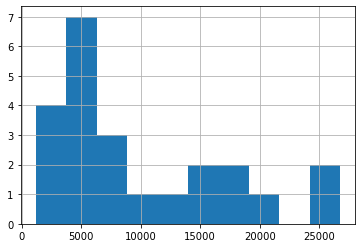

In [34]:
most_populace_colleges.hist()

<AxesSubplot:xlabel='Institute New Combined'>

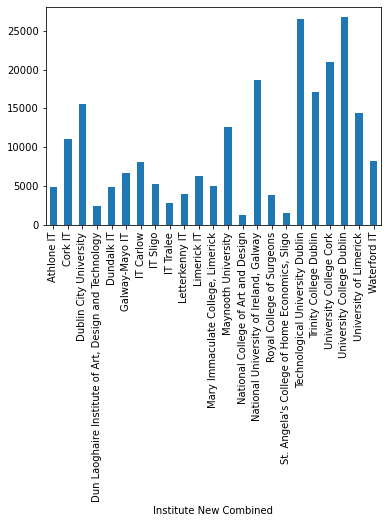

In [35]:
most_populace_colleges.plot(x="Institute New Combined", kind="bar", rot=90)

In [36]:
most_populace_colleges.head()

Institute New Combined
Athlone IT                                                4833
Cork IT                                                  11054
Dublin City University                                   15558
Dun Laoghaire Institute of Art, Design and Technology     2335
Dundalk IT                                                4872
Name: Number of Students, dtype: int64

In [37]:
SE_colleges = most_populace_colleges ("Institute New Combined" ["Carlow", "Kilkenny"])

<>:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
<ipython-input-37-383e0f9435c1>:1: SyntaxWarning: str indices must be integers or slices, not tuple; perhaps you missed a comma?
  SE_colleges = most_populace_colleges ("Institute New Combined" ["Carlow", "Kilkenny"])


TypeError: string indices must be integers

In [41]:
SE_counties_students = (raw_material ["County"]==["Carlow"])

ValueError: ('Lengths must match to compare', (16885,), (1,))